In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma as gamma
import scipy.stats as stats 

%matplotlib inline

# Lab 4: Heirarchial Models in Meta-Study Analysis
Name: Marcelina Nagales <br>
Due Date: 04/17/18

In [46]:
def posterior(fx):

    mu = fx[0]
    tau_sq = fx[1]
   # print (mu, tau_sq)

    odds_ratio = [1.06, -0.1, 0.62, 0.02, 1.07, -0.02, -0.12, -0.38, 0.51, 0.0, 0.38, 0.4]
    sigma_i = [0.37, 0.11, 0.22, 0.11, 0.12, 0.12, 0.22, 0.23, 0.18, 0.32, 0.20, 0.25]

    prior = np.log(stats.norm.pdf(mu, 0, 1000.*tau_sq))+ np.log(stats.gamma.pdf(1/tau_sq, 0.1, 0.1))

    overall_likelihood = 0
    for i in range(len(odds_ratio)):
        exp_part1 = (mu*sigma_i[i]**2 + odds_ratio[i]*tau_sq)**2/(sigma_i[i]**2 + tau_sq)
        exp_part_all = (-mu**2*sigma_i[i]**2 - odds_ratio[i]**2*tau_sq + exp_part1)/(2*sigma_i[i]**2*tau_sq)
        olstep_i = np.log(1/np.sqrt(2*np.pi*(sigma_i[i]**2 + tau_sq))) + exp_part_all
        overall_likelihood = overall_likelihood + olstep_i

    return overall_likelihood + prior

In [4]:
# sandbox

mu = 1.
tau_sq = 1.
# print (mu, tau_sq)

odds_ratio = [1.06, -0.1, 0.62, 0.02, 1.07, -0.02, -0.12, -0.38, 0.51, 0.0, 0.38, 0.4]
sigma_i = [0.37, 0.11, 0.22, 0.11, 0.12, 0.12, 0.22, 0.23, 0.18, 0.32, 0.20, 0.25]

prior = np.log(stats.norm.pdf(mu, 0, 1000.*tau_sq))+ np.log(stats.gamma.pdf(1/tau_sq, 0.1, 0.1))

overall_likelihood = 0
for i in range(len(odds_ratio)):
    exp_part1 = (mu*sigma_i[i]**2 + odds_ratio[i]*tau_sq)**2/(sigma_i[i]**2 + tau_sq)
    exp_part_all = (-mu**2*sigma_i[i]**2 - odds_ratio[i]**2*tau_sq + exp_part1)/(2*sigma_i[i]**2*tau_sq)
    olstep_i = np.log(1/np.sqrt(2*np.pi*(sigma_i[i]**2 + tau_sq))) + exp_part_all
    overall_likelihood = overall_likelihood + olstep_i

overall_likelihood + prior

-26.274541066303772

In [48]:
# proposal
def proposal(xc, delta):
    # change tau_sq and mu with delta
    tau_sq = -1
    mu = np.random.normal(xc[0], delta[0])
    while tau_sq < 0:
        tau_sq = np.random.normal(xc[1], delta[1])
    
    return [mu, tau_sq]

In [52]:
# acceptance test
def accept(x_old, x_new, posterior):
    accept_r = False
    
    # calculate posterior_new/posterior_old
    ratio = np.exp(posterior(x_new) - posterior(x_old))
    
    # if posterior_ratio is greater than some random value, accept proposal
    if ratio > 1.:
        accept_r = True
    elif ratio > np.random.rand():
        accept_r = True
    else:
        accept_r = False
        
    # return acceptance (bool)
    return accept_r

In [50]:
# metropolis driver
def metropolis_MCMC(nmcs, delta, init):
     
    x = np.zeros((nmcs, 2))
    xc = init
    Acc = 0.0
        
    # for loop n steps (nmcs)
    for i in range(nmcs):
    
        # log current state
        x[i] = xc
        # new state, proposed
        xn = proposal(xc, delta)
        # if accept, 
        if (accept(xc, xn, posterior)):
            # current state = new state
            xc = xn
            # inc number of sucesses
            Acc = Acc + 1
    # return all states, and ratio of success
    return x, Acc/nmcs

In [75]:
x, acc_percent = metropolis_MCMC(10000, [0.1, 0.1], [1.0, 1.0])
acc_percent

/home/celine/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


0.7659

Text(0.5,1,u'Trace plot: $\\mu$')

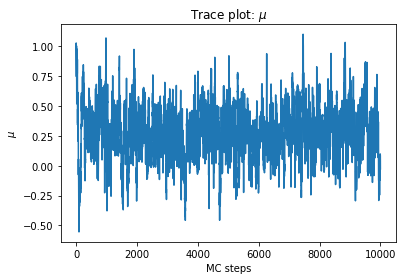

In [79]:
t = np.linspace(0, 10000, len(x[:, 0]))

plt.plot(t, x[:, 0])
plt.ylabel("$\mu$")
plt.xlabel("MC steps")
plt.title("Trace plot: $\mu$")

Text(0.5,1,u'Trace Plot: Tau^2')

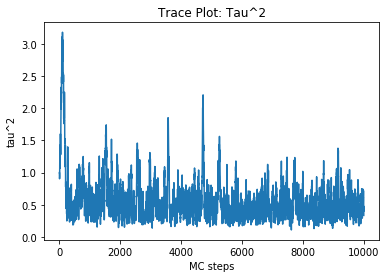

In [80]:
t = np.linspace(0, 10000, len(x[:, 0]))

plt.plot(t, x[:, 1])
plt.ylabel("tau^2")
plt.xlabel("MC steps")
plt.title("Trace Plot: Tau^2")

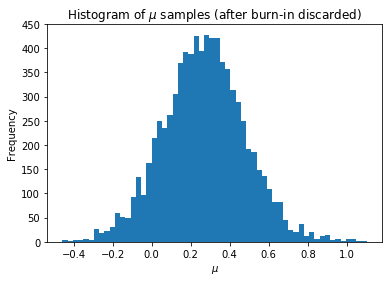

In [86]:
# discarded burn-in

plt.hist(x[2000:, 0], bins='auto')
plt.ylabel("Frequency")
plt.xlabel("$\mu$")
plt.title("Histogram of $\mu$ samples (after burn-in discarded)")
plt.show()

In [76]:
# the expected value of mu
np.mean(x[2000:, 0])

0.26882826910603042

> The expected value of $\mu$ is 0.2688. <br>
> The "true" log odds ratio for the population is $\mu$, and the logarithm of the odds ratio ranges between $-\infty$ through 0, to $\infty$. Since the estimation of $\mu$ turns out to be closest to 0, this follows that the trait produces no enhancement in disease (no effect). Although the expected value is not exactly 0, you still have to factor in Measurement error and Sampling Error